In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [6]:
df = pd.read_csv('../data/clean_crime_data.csv')

In [ ]:
df['Hour'] = df['TIME OCC'].astype(str).str.zfill(4).str[:2] + '00'

features = ['Vict Age', 'Premis Desc', 'Hour']
X = df[features]

X = pd.get_dummies(X, drop_first=True)

y = df['Crime Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=min(X_train_scaled.shape[0], X_train_scaled.shape[1]))
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 47.65%


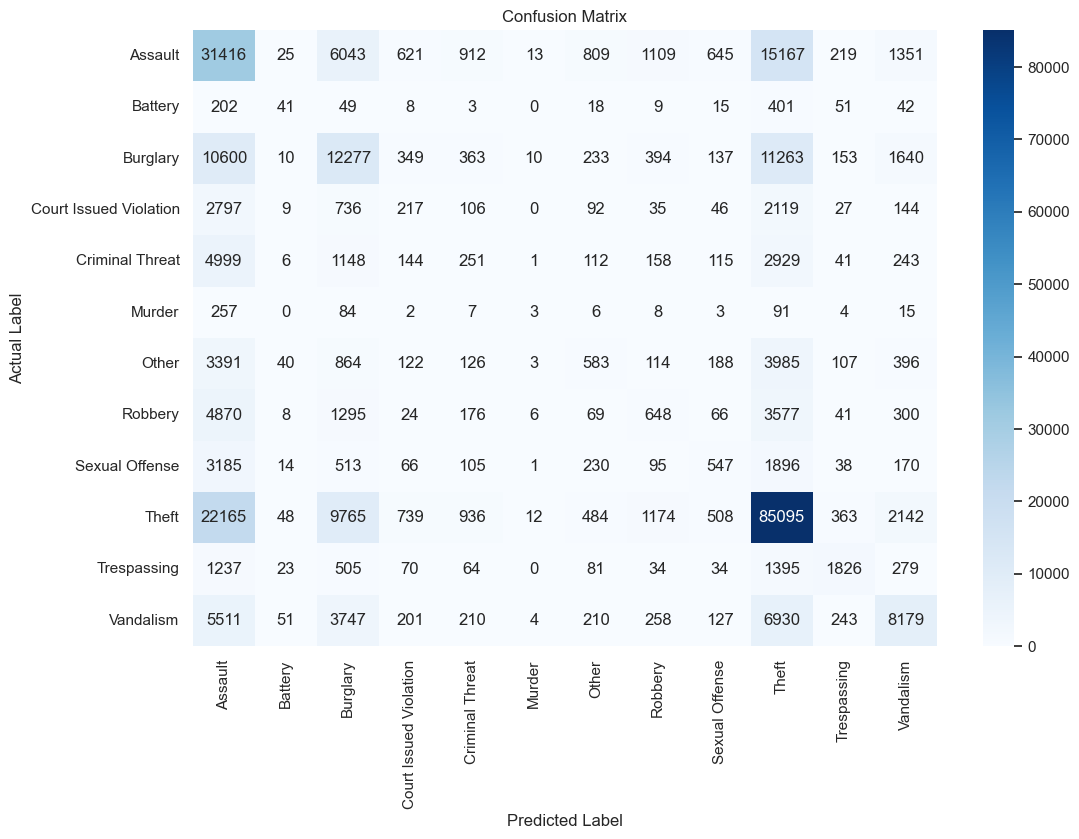

In [8]:
cm = confusion_matrix(y_test, y_pred)

class_labels = np.unique(y)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Overall, the model performs well in predicting certain types of crimes, with the highest number of true positive predictions for Theft. Assault and Burglary also have relatively high accuracy, suggesting that these crimes were predicted fairly well. However, the model struggles with less common or more nuanced categories such as Murder, Criminal Threats, and Sexual Offenses, which shows a low number of true positives, indicating difficulty in accurately classifying these instances. Common misclassifications include Burglary being predicted as Theft and Robbery being misclassified as Other, suggesting that these crime types share similarities in their features or descriptions, which may lead to confusion. Overall, while the model effectively identifies some crime categories, it struggles in differentiating between categories with overlapping characteristics and enhancing predictions for less frequently occurring crimes.